<a href="https://colab.research.google.com/github/surajKrish/TMLC/blob/main/Road_Traffic_Severity_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## 1. Load necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls

import plotly.express as px
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)
from sklearn.svm import SVC
from numpy import mean
from numpy import std

## 2. Import dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/visalakshi2001/rta-severity-prediction/main/RTA%20Dataset.csv')
df_copy = df.copy()

In [ ]:
df.head()
# df.tail()
# df.sample(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


".head()" method will show the first 5 rows of the dataframe.

In [ ]:
col_map={
    'Time': 'time',
    'Day_of_week': 'day_of_week',
    'Age_band_of_driver': 'driver_age',
    'Sex_of_driver': 'driver_sex',
    'Educational_level': 'educational_level',
    'Vehicle_driver_relation': 'vehicle_driver_relation',
    'Driving_experience': 'driving_experience',
    'Type_of_vehicle': 'vehicle_type',
    'Owner_of_vehicle': 'vehicle_owner',
    'Service_year_of_vehicle': 'service_year',
    'Defect_of_vehicle': 'vehicle_defect',
    'Area_accident_occured': 'accident_area',
    'Lanes_or_Medians': 'lanes',
    'Road_allignment': 'road_allignment',
    'Types_of_Junction': 'junction_type',
    'Road_surface_type': 'surface_type',
    'Road_surface_conditions': 'road_surface_conditions',
    'Light_conditions': 'light_condition',
    'Weather_conditions': 'weather_condition',
    'Type_of_collision': 'collision_type',
    'Number_of_vehicles_involved': 'vehicles_involved',
    'Number_of_casualties': 'casualties',
    'Vehicle_movement': 'vehicle_movement',
    'Casualty_class': 'casualty_class',
    'Sex_of_casualty': 'casualty_sex' , 
    'Age_band_of_casualty': 'casualty_age', 
    'Casualty_severity': 'casualty_severity',
    'Work_of_casuality': 'casualty_work', 
    'Fitness_of_casuality': 'casualty_fitness',
    'Pedestrian_movement': 'pedestrian_movement',
    'Cause_of_accident': 'accident_cause',
    'Accident_severity': 'accident_severity'
}
df.rename(columns=col_map, inplace=True)

## 3. Basic Data Exploration

1. Checking the shape of the data
2. Checking the columns of the data
3. Checking the datatypes
4. Looking for missing values
5. Putting it all together
6. Looking for duplicates
7. Statistical description of the data

In [ ]:
df_shape = df.shape
print('We have ' , df_shape[0], ' rows and ', df_shape[1], ' columns of observations.')

We have  12316  rows and  32  columns of observations.


In [ ]:
df.columns

Index(['time', 'day_of_week', 'driver_age', 'driver_sex', 'educational_level',
       'vehicle_driver_relation', 'driving_experience', 'vehicle_type',
       'vehicle_owner', 'service_year', 'vehicle_defect', 'accident_area',
       'lanes', 'road_allignment', 'junction_type', 'surface_type',
       'road_surface_conditions', 'light_condition', 'weather_condition',
       'collision_type', 'vehicles_involved', 'casualties', 'vehicle_movement',
       'casualty_class', 'casualty_sex', 'casualty_age', 'casualty_severity',
       'casualty_work', 'casualty_fitness', 'pedestrian_movement',
       'accident_cause', 'accident_severity'],
      dtype='object')

In [ ]:
df.dtypes

time                       object
day_of_week                object
driver_age                 object
driver_sex                 object
educational_level          object
vehicle_driver_relation    object
driving_experience         object
vehicle_type               object
vehicle_owner              object
service_year               object
vehicle_defect             object
accident_area              object
lanes                      object
road_allignment            object
junction_type              object
surface_type               object
road_surface_conditions    object
light_condition            object
weather_condition          object
collision_type             object
vehicles_involved           int64
casualties                  int64
vehicle_movement           object
casualty_class             object
casualty_sex               object
casualty_age               object
casualty_severity          object
casualty_work              object
casualty_fitness           object
pedestrian_mov

In [ ]:
# converting 'time' to datetime
df['time'] = pd.to_datetime(df['time'])
df.dtypes

time                       datetime64[ns]
day_of_week                        object
driver_age                         object
driver_sex                         object
educational_level                  object
vehicle_driver_relation            object
driving_experience                 object
vehicle_type                       object
vehicle_owner                      object
service_year                       object
vehicle_defect                     object
accident_area                      object
lanes                              object
road_allignment                    object
junction_type                      object
surface_type                       object
road_surface_conditions            object
light_condition                    object
weather_condition                  object
collision_type                     object
vehicles_involved                   int64
casualties                          int64
vehicle_movement                   object
casualty_class                    

In [ ]:
df.describe(include=['O']).T

,count,unique,top,freq
day_of_week,12316,7,Friday,2041
driver_age,12316,5,18-30,4271
driver_sex,12316,3,Male,11437
educational_level,11575,7,Junior high school,7619
vehicle_driver_relation,11737,4,Employee,9627
driving_experience,11487,7,5-10yr,3363
vehicle_type,11366,17,Automobile,3205
vehicle_owner,11834,4,Owner,10459
service_year,8388,6,Unknown,2883
vehicle_defect,7889,3,No defect,7777


### Looking for missing values

The ".isnull()" method will show us the missing values within the dataframe.

In [ ]:
df.isnull().any()

time                       False
day_of_week                False
driver_age                 False
driver_sex                 False
educational_level           True
vehicle_driver_relation     True
driving_experience          True
vehicle_type                True
vehicle_owner               True
service_year                True
vehicle_defect              True
accident_area               True
lanes                       True
road_allignment             True
junction_type               True
surface_type                True
road_surface_conditions    False
light_condition            False
weather_condition          False
collision_type              True
vehicles_involved          False
casualties                 False
vehicle_movement            True
casualty_class             False
casualty_sex               False
casualty_age               False
casualty_severity          False
casualty_work               True
casualty_fitness            True
pedestrian_movement        False
accident_c

In [ ]:
df.isnull().sum()

time                          0
day_of_week                   0
driver_age                    0
driver_sex                    0
educational_level           741
vehicle_driver_relation     579
driving_experience          829
vehicle_type                950
vehicle_owner               482
service_year               3928
vehicle_defect             4427
accident_area               239
lanes                       385
road_allignment             142
junction_type               887
surface_type                172
road_surface_conditions       0
light_condition               0
weather_condition             0
collision_type              155
vehicles_involved             0
casualties                    0
vehicle_movement            308
casualty_class                0
casualty_sex                  0
casualty_age                  0
casualty_severity             0
casualty_work              3198
casualty_fitness           2635
pedestrian_movement           0
accident_cause                0
accident

In [ ]:
# print duplicates
print("Number of duplicates: ", df.duplicated().sum())
print("Unique values per column:")
df.nunique()

Number of duplicates:  0
Unique values per column:


time                       1074
day_of_week                   7
driver_age                    5
driver_sex                    3
educational_level             7
vehicle_driver_relation       4
driving_experience            7
vehicle_type                 17
vehicle_owner                 4
service_year                  6
vehicle_defect                3
accident_area                14
lanes                         7
road_allignment               9
junction_type                 8
surface_type                  5
road_surface_conditions       4
light_condition               4
weather_condition             9
collision_type               10
vehicles_involved             6
casualties                    8
vehicle_movement             13
casualty_class                4
casualty_sex                  3
casualty_age                  6
casualty_severity             4
casualty_work                 7
casualty_fitness              5
pedestrian_movement           9
accident_cause               20
accident

In [ ]:
# extracting hour and minute from timestamp
df['hour'] = df['time'].dt.hour
df['minute'] = df['time'].dt.minute
df.drop('time', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   day_of_week              12316 non-null  object
 1   driver_age               12316 non-null  object
 2   driver_sex               12316 non-null  object
 3   educational_level        11575 non-null  object
 4   vehicle_driver_relation  11737 non-null  object
 5   driving_experience       11487 non-null  object
 6   vehicle_type             11366 non-null  object
 7   vehicle_owner            11834 non-null  object
 8   service_year             8388 non-null   object
 9   vehicle_defect           7889 non-null   object
 10  accident_area            12077 non-null  object
 11  lanes                    11931 non-null  object
 12  road_allignment          12174 non-null  object
 13  junction_type            11429 non-null  object
 14  surface_type             12144 non-nul

In [ ]:
df = df.replace('na', np.nan)
df.isnull().sum()

day_of_week                   0
driver_age                    0
driver_sex                    0
educational_level           741
vehicle_driver_relation     579
driving_experience          829
vehicle_type                950
vehicle_owner               482
service_year               3928
vehicle_defect             4427
accident_area               239
lanes                       385
road_allignment             142
junction_type               887
surface_type                172
road_surface_conditions       0
light_condition               0
weather_condition             0
collision_type              155
vehicles_involved             0
casualties                    0
vehicle_movement            308
casualty_class             4443
casualty_sex               4443
casualty_age               4443
casualty_severity          4443
casualty_work              3198
casualty_fitness           2635
pedestrian_movement           0
accident_cause                0
accident_severity             0
hour    

In [ ]:
# dropping columns that can cause imbalance while imputation
df.drop(columns = ['vehicle_defect', 'vehicle_driver_relation', 'casualty_work', 'casualty_fitness',], inplace=True)

In [ ]:
categorical = list(df.dtypes[df.dtypes == 'object'].index)
categorical

['day_of_week',
 'driver_age',
 'driver_sex',
 'educational_level',
 'driving_experience',
 'vehicle_type',
 'vehicle_owner',
 'service_year',
 'accident_area',
 'lanes',
 'road_allignment',
 'junction_type',
 'surface_type',
 'road_surface_conditions',
 'light_condition',
 'weather_condition',
 'collision_type',
 'vehicle_movement',
 'casualty_class',
 'casualty_sex',
 'casualty_age',
 'casualty_severity',
 'pedestrian_movement',
 'accident_cause',
 'accident_severity']

In [ ]:
numerical = list(df.dtypes[df.dtypes == 'int64'].index)
numerical

['vehicles_involved', 'casualties', 'hour', 'minute']

In [ ]:
missing_value_column_list = df.columns[df.isnull().sum() > 0]
#for col in missing_value_column_list:
#  df[col].fillna(df[col].mode()[0], inplace=True)
df_unknown = df.fillna('Unknown')

df_unknown.isnull().sum()

day_of_week                0
driver_age                 0
driver_sex                 0
educational_level          0
driving_experience         0
vehicle_type               0
vehicle_owner              0
service_year               0
accident_area              0
lanes                      0
road_allignment            0
junction_type              0
surface_type               0
road_surface_conditions    0
light_condition            0
weather_condition          0
collision_type             0
vehicles_involved          0
casualties                 0
vehicle_movement           0
casualty_class             0
casualty_sex               0
casualty_age               0
casualty_severity          0
pedestrian_movement        0
accident_cause             0
accident_severity          0
hour                       0
minute                     0
dtype: int64

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
result = encoder.fit_transform(df_unknown[categorical])
df_unknown = pd.concat([pd.DataFrame(result, columns=categorical), df_unknown[numerical]], axis=1)
df_unknown.head()

,day_of_week,driver_age,driver_sex,educational_level,driving_experience,vehicle_type,vehicle_owner,service_year,accident_area,lanes,...,casualty_sex,casualty_age,casualty_severity,pedestrian_movement,accident_cause,accident_severity,vehicles_involved,casualties,hour,minute
0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,3.0,9.0,5.0,...,2.0,5.0,3.0,5.0,9.0,2.0,2,2,17,2
1,1.0,1.0,1.0,4.0,3.0,11.0,3.0,2.0,6.0,4.0,...,2.0,5.0,3.0,5.0,16.0,2.0,2,2,17,2
2,1.0,0.0,1.0,4.0,0.0,5.0,3.0,5.0,1.0,6.0,...,1.0,1.0,2.0,5.0,0.0,1.0,2,2,17,2
3,3.0,0.0,1.0,4.0,2.0,11.0,0.0,5.0,6.0,6.0,...,0.0,0.0,2.0,5.0,1.0,2.0,2,2,1,6
4,3.0,0.0,1.0,4.0,1.0,17.0,3.0,2.0,4.0,6.0,...,2.0,5.0,3.0,5.0,16.0,2.0,2,2,1,6


accident_severity
0.0      158
1.0     1743
2.0    10415
dtype: int64


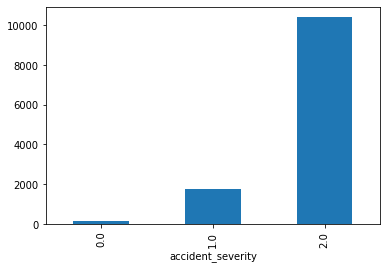

In [ ]:
# Checking target value counts
class_counts = df_unknown.groupby('accident_severity').size()
print(class_counts)
class_counts.plot(kind='bar')

Plot for column  day_of_week  values


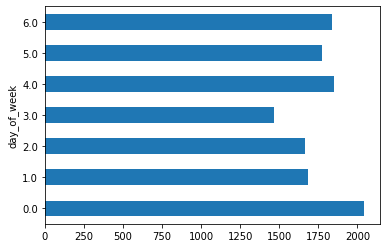

Plot for column  driver_age  values


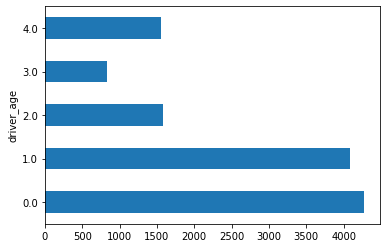

Plot for column  driver_sex  values


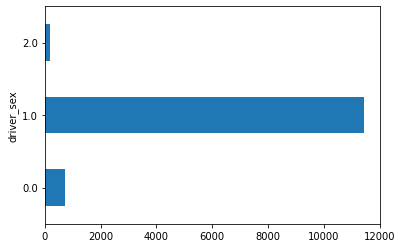

Plot for column  educational_level  values


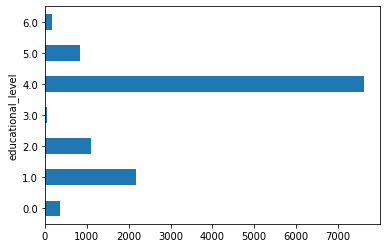

Plot for column  driving_experience  values


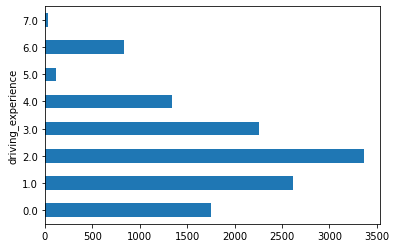

Plot for column  vehicle_type  values


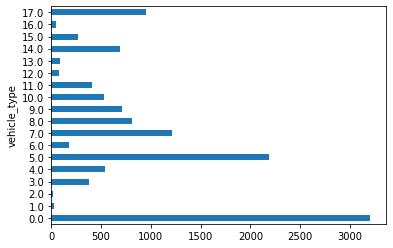

Plot for column  vehicle_owner  values


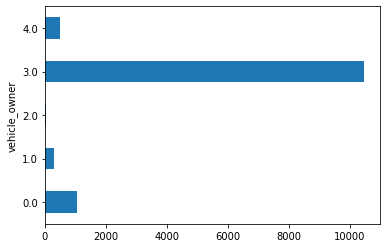

Plot for column  service_year  values


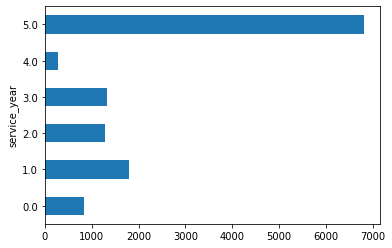

Plot for column  accident_area  values


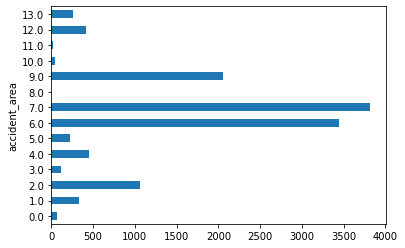

Plot for column  lanes  values


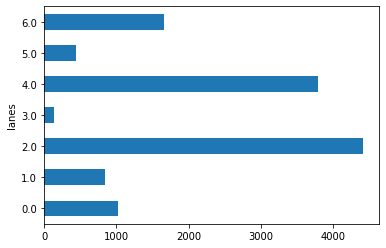

Plot for column  road_allignment  values


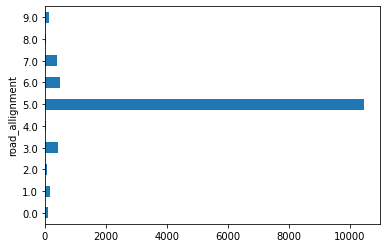

Plot for column  junction_type  values


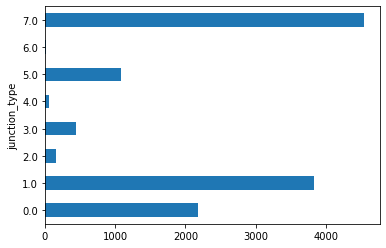

Plot for column  surface_type  values


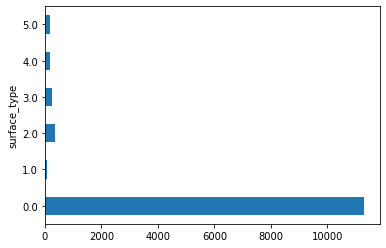

Plot for column  road_surface_conditions  values


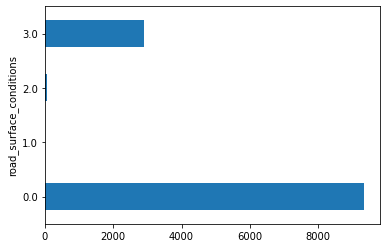

Plot for column  light_condition  values


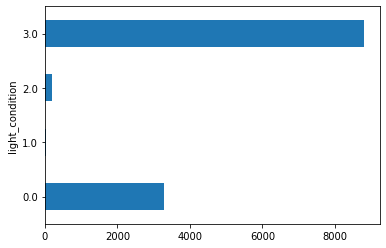

Plot for column  weather_condition  values


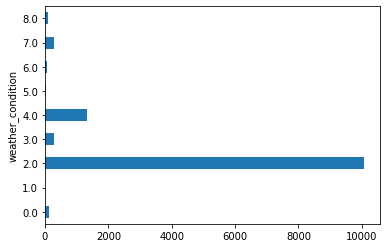

Plot for column  collision_type  values


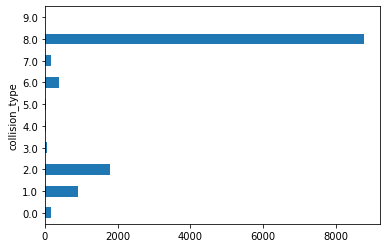

Plot for column  vehicle_movement  values


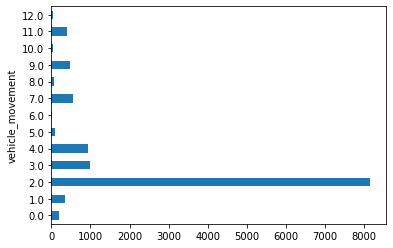

Plot for column  casualty_class  values


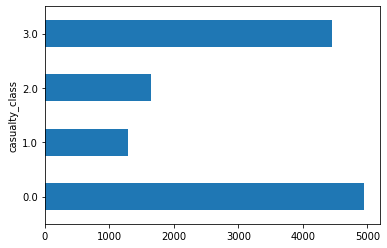

Plot for column  casualty_sex  values


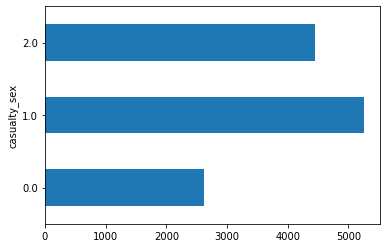

Plot for column  casualty_age  values


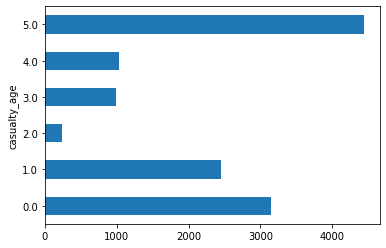

Plot for column  casualty_severity  values


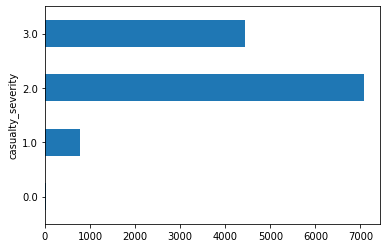

Plot for column  pedestrian_movement  values


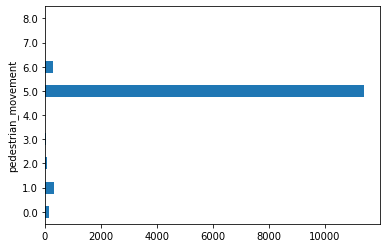

Plot for column  accident_cause  values


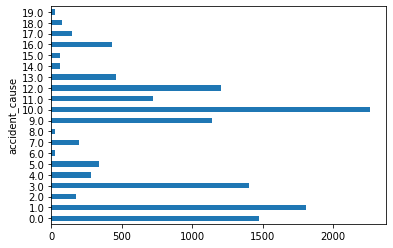

Plot for column  accident_severity  values


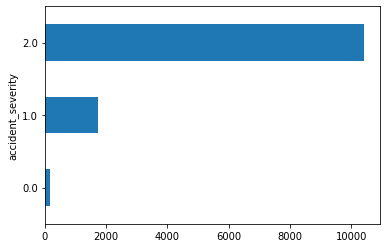

In [ ]:
# Checking all categorical value counts
for col in categorical:
  class_counts = df_unknown.groupby(col).size()
  print("Plot for column ", col, " values")
  class_counts.plot(kind='barh')
  plt.show()

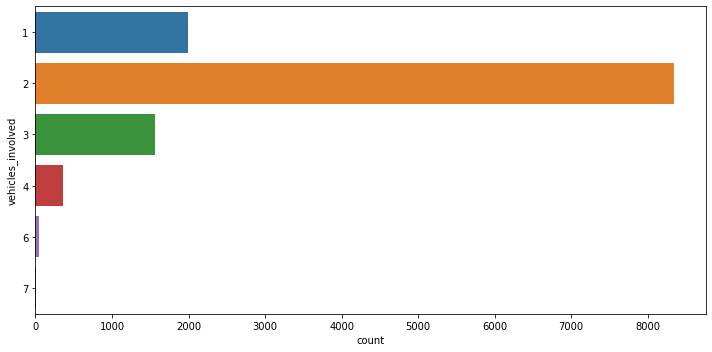

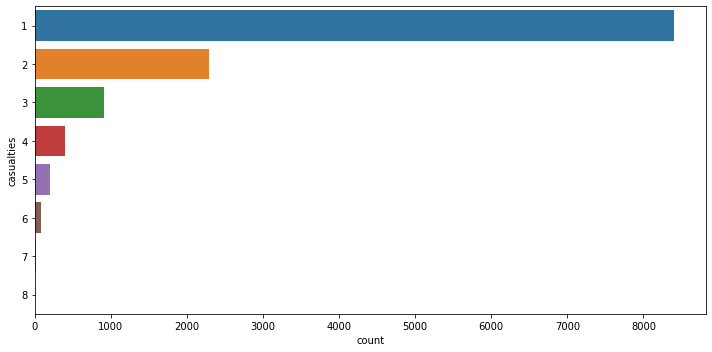

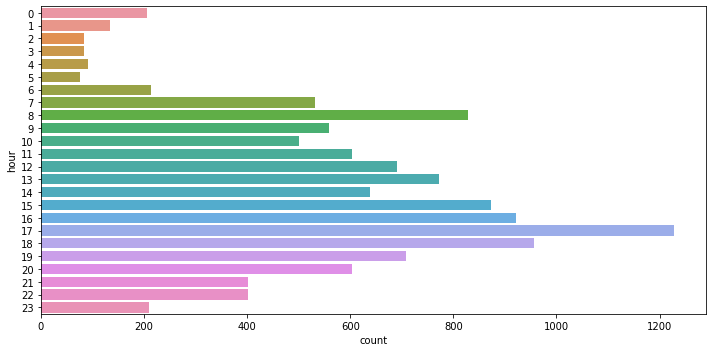

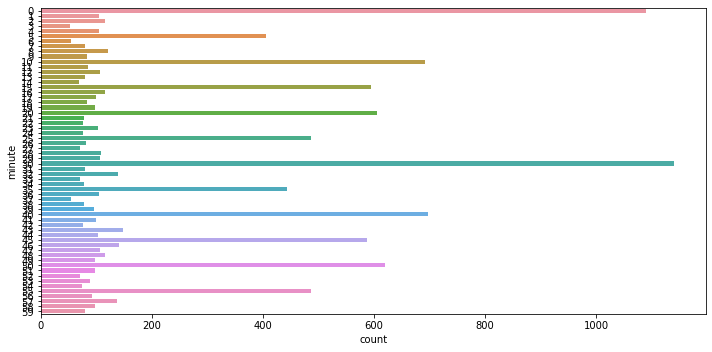

In [ ]:
# checking the distribution of numerical variables
for col in numerical:
  plt.figure(figsize=(10,5))
  # sns.histplot(df_unknown[col], bins=10)
  sns.countplot(data=df_unknown, y=col)
  plt.tight_layout()
  plt.show()

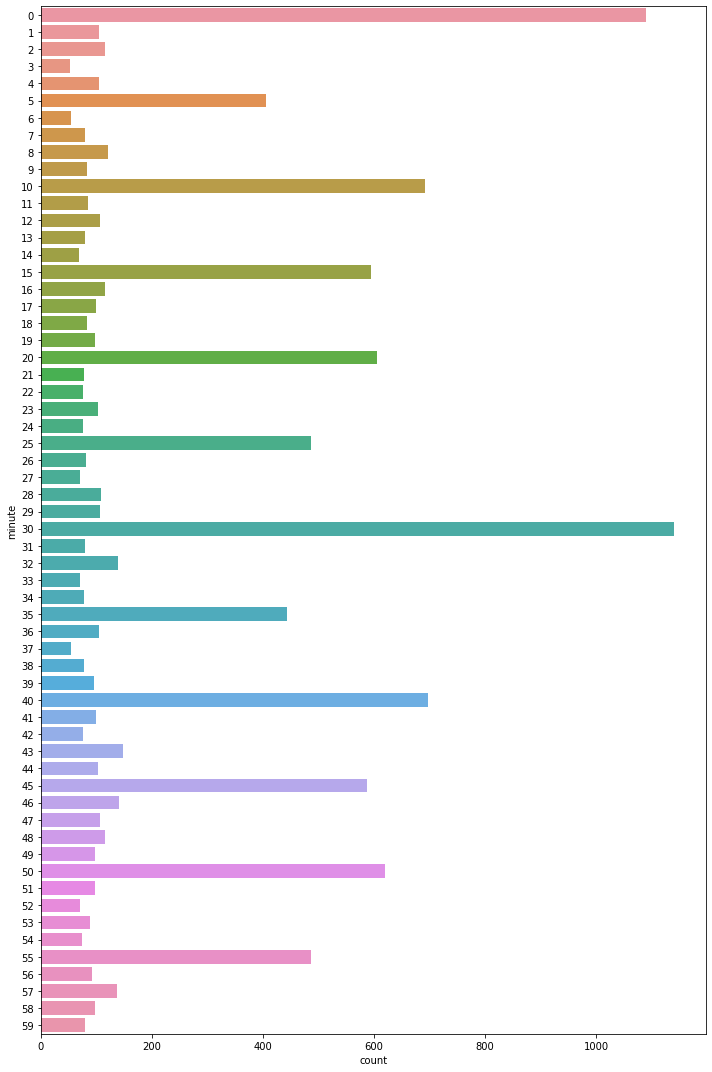

In [ ]:
plt.figure(figsize=(10,15))
sns.countplot(data=df_unknown, y='minute')
plt.tight_layout()

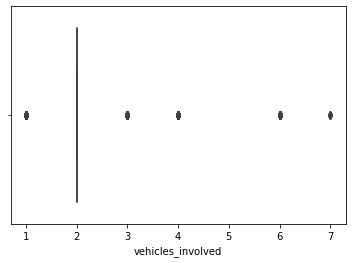

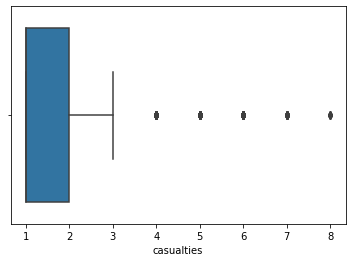

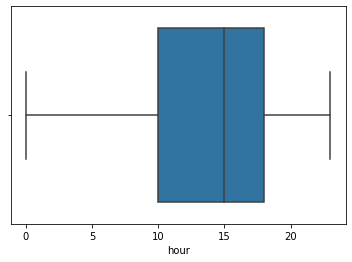

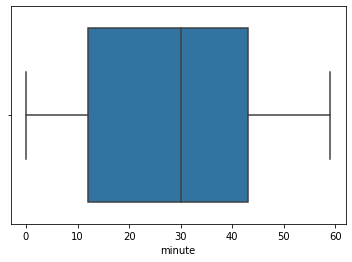

In [ ]:
for col in numerical:
  sns.boxplot(data=df_unknown, x=col)
  plt.show()

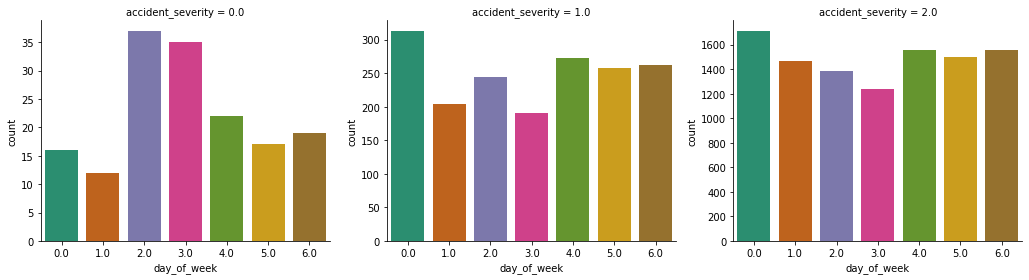

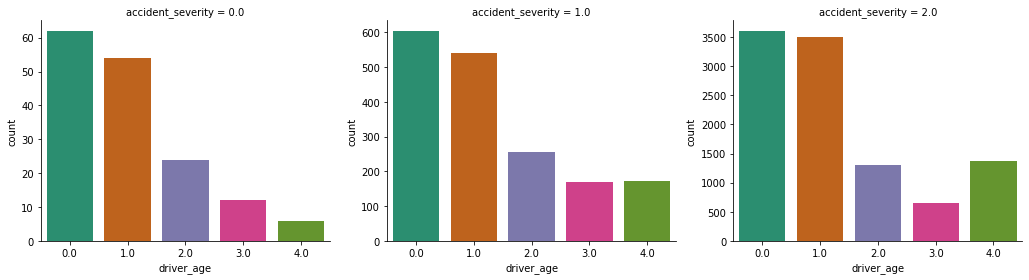

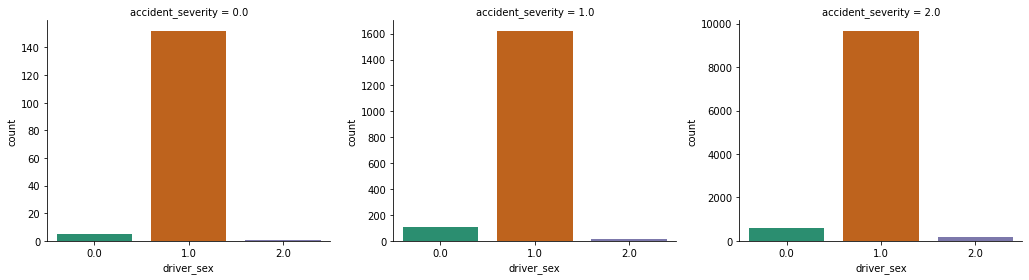

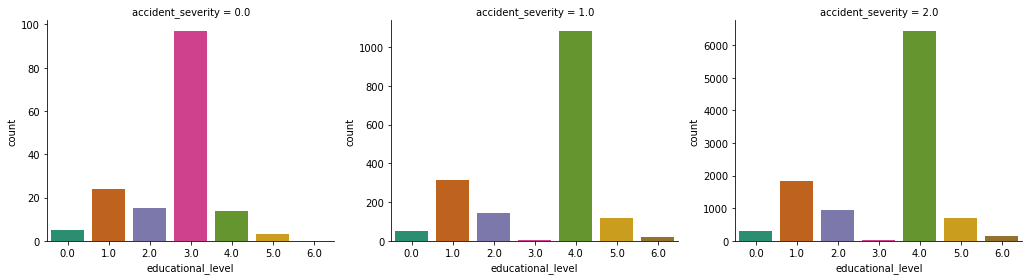

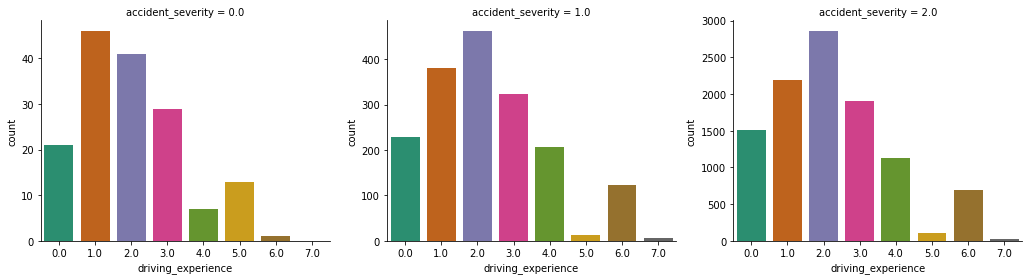

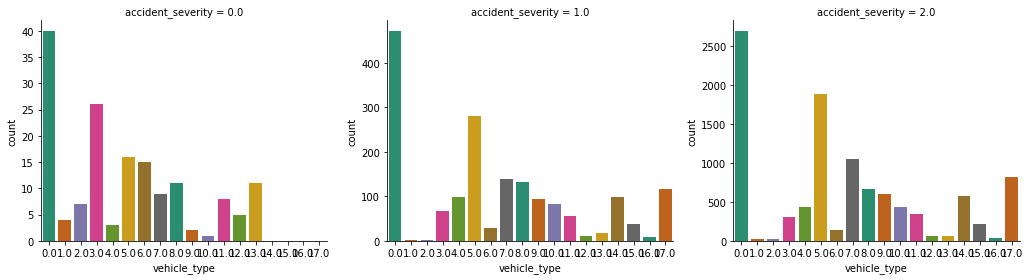

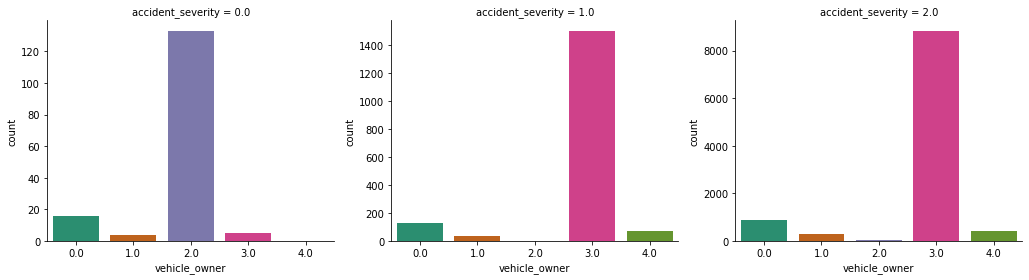

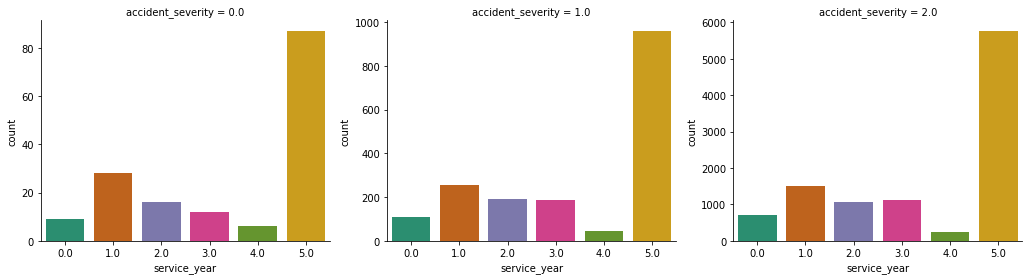

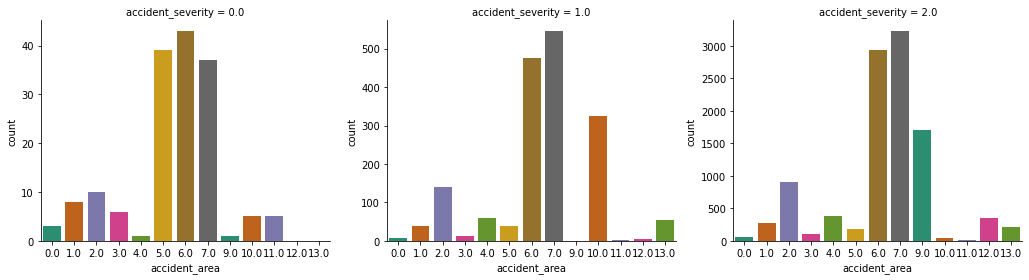

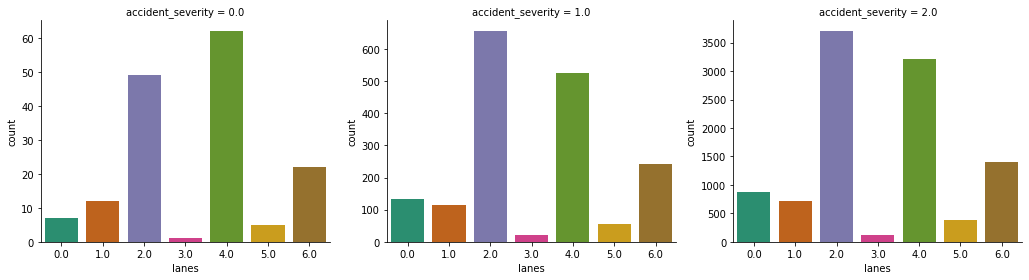

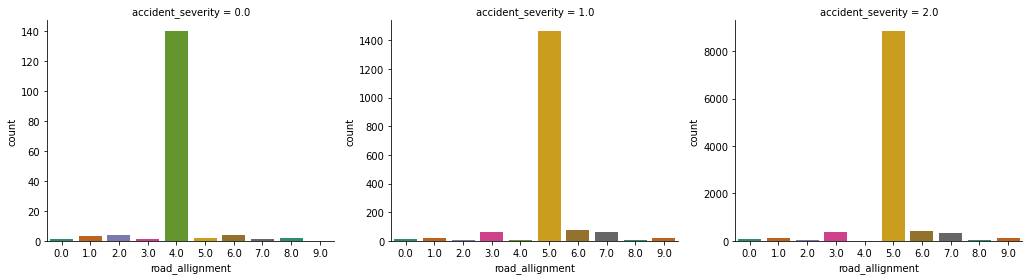

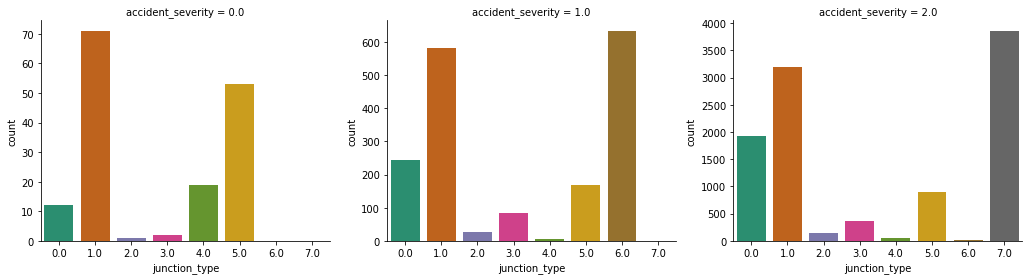

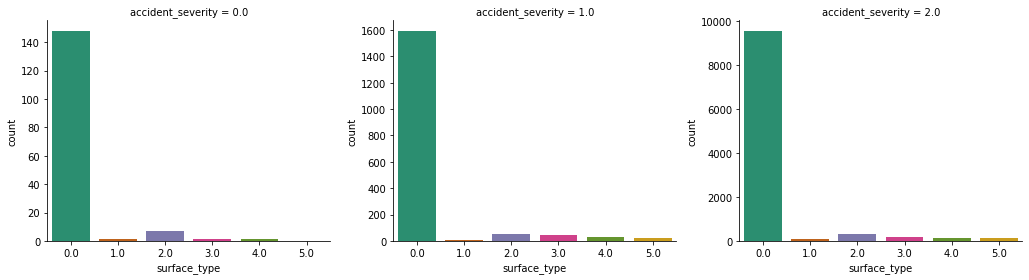

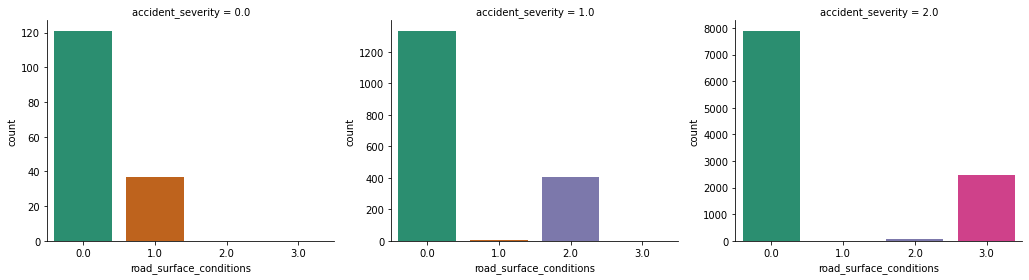

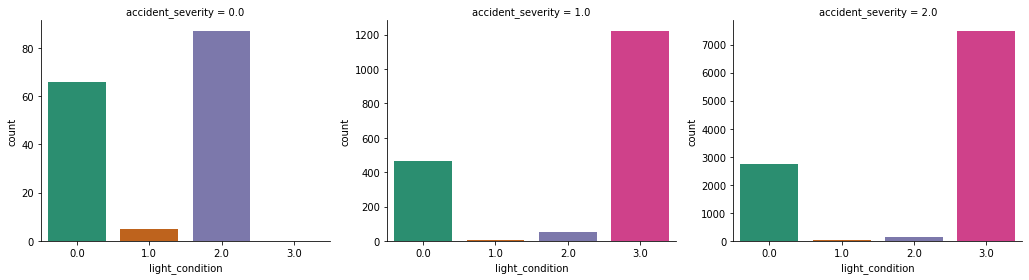

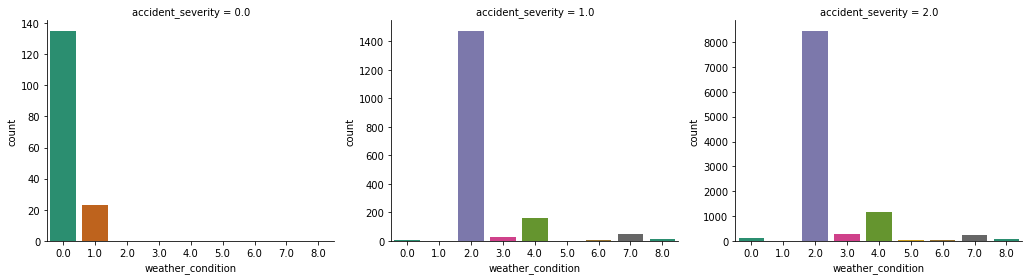

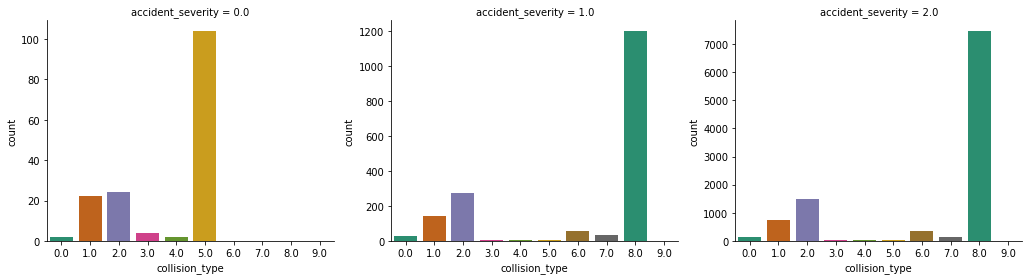

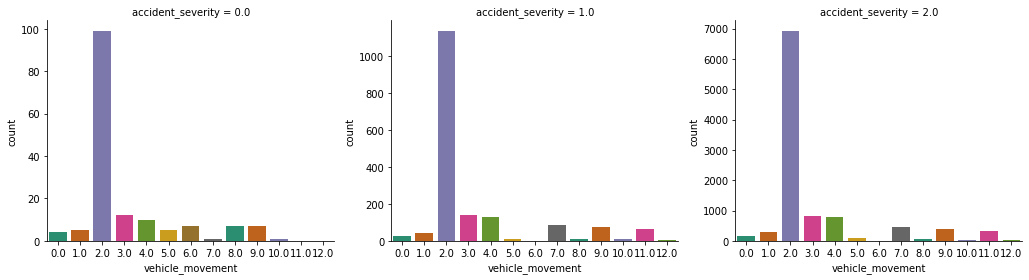

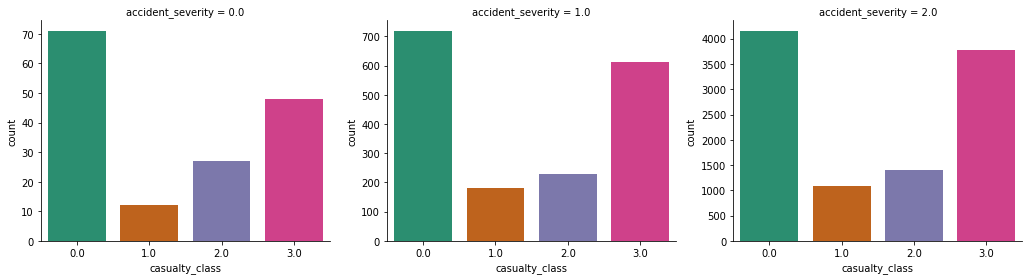

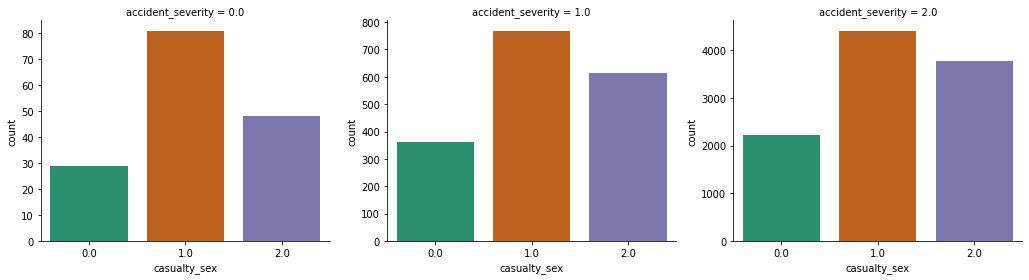

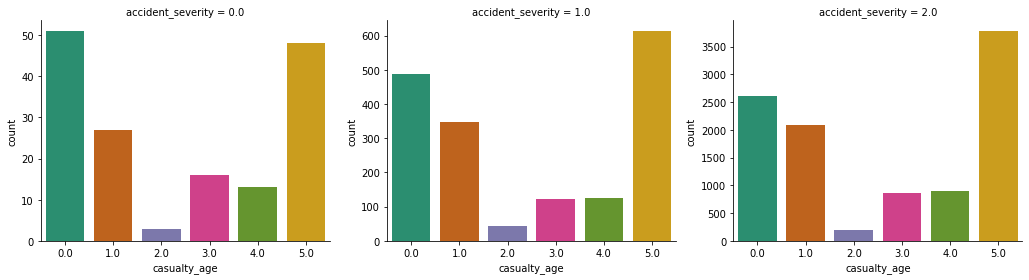

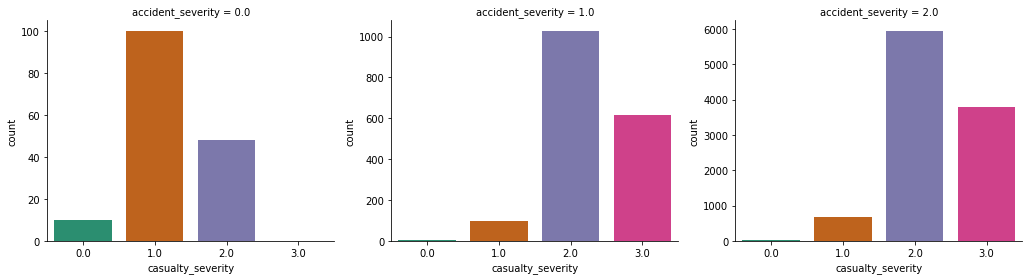

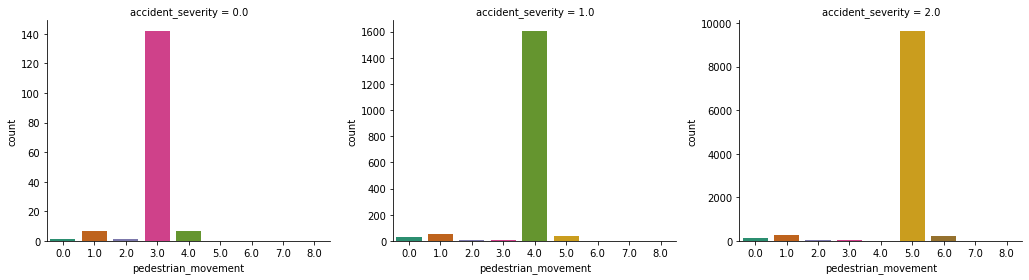

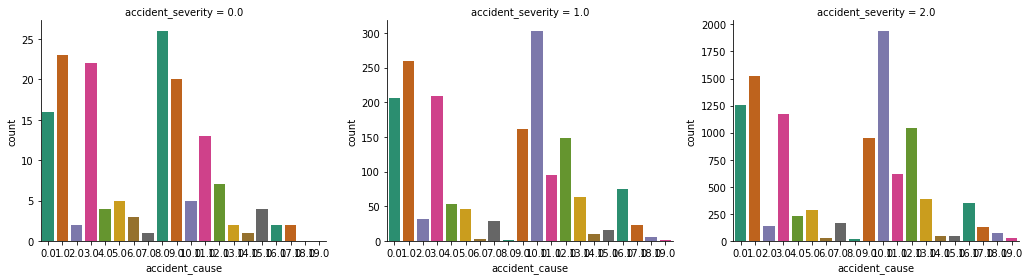

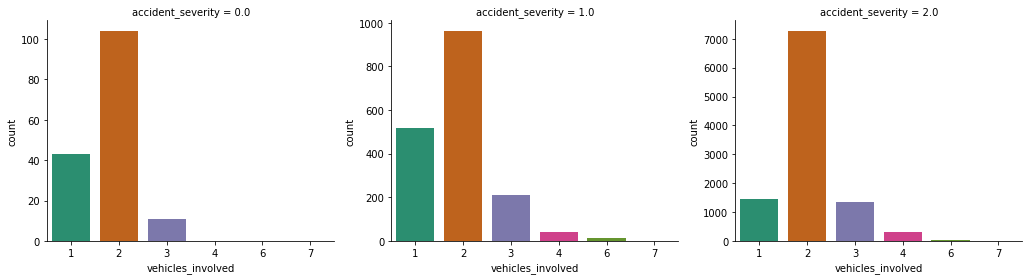

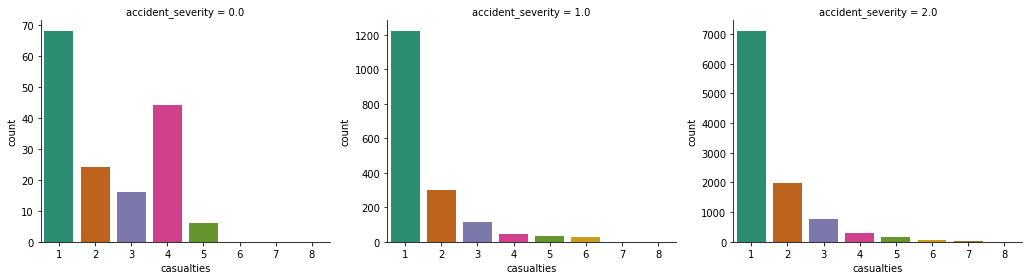

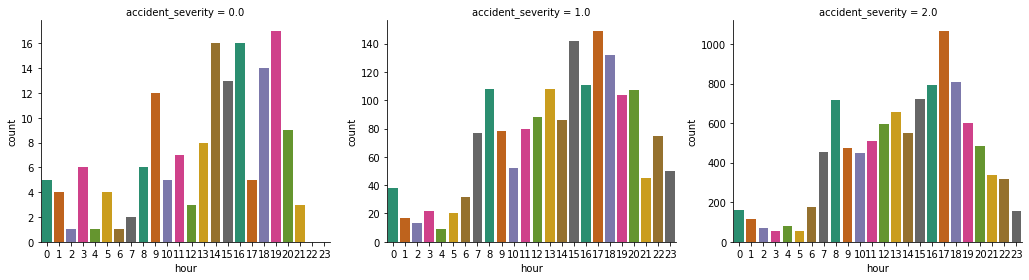

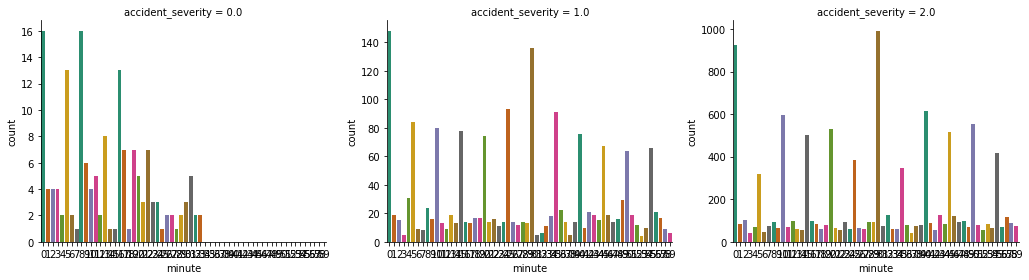

In [ ]:
# for col1 in numerical:
#   for col2 in categorical:
#     plt.figure(figsize=(20,10))
#     plt.figure(figsize=(10,7))
#     sns.boxplot(data=df_unknown, x=col1, y=col2)
#     plt.show()
for col in df_unknown.drop('accident_severity', axis=1):
    g = sns.FacetGrid(df_unknown, col='accident_severity', size=4, aspect=1.2, sharey=False)
    g.map(sns.countplot, col, palette = 'Dark2')
    plt.show()

In this plot, we find that there is not much relationship (weak correlation) between number of casualties and number of vehicles involved except that the most casualties happened when 2-4 vehicles were involved.

In [ ]:
y_unknown = df_unknown['accident_severity']
X_unknown = df_unknown.drop(['accident_severity'], axis = 1)

In [ ]:
X_unknown.head()

,day_of_week,driver_age,driver_sex,educational_level,driving_experience,vehicle_type,vehicle_owner,service_year,accident_area,lanes,...,casualty_class,casualty_sex,casualty_age,casualty_severity,pedestrian_movement,accident_cause,vehicles_involved,casualties,hour,minute
0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,3.0,9.0,5.0,...,3.0,2.0,5.0,3.0,5.0,9.0,2,2,17,2
1,1.0,1.0,1.0,4.0,3.0,11.0,3.0,2.0,6.0,4.0,...,3.0,2.0,5.0,3.0,5.0,16.0,2,2,17,2
2,1.0,0.0,1.0,4.0,0.0,5.0,3.0,5.0,1.0,6.0,...,0.0,1.0,1.0,2.0,5.0,0.0,2,2,17,2
3,3.0,0.0,1.0,4.0,2.0,11.0,0.0,5.0,6.0,6.0,...,2.0,0.0,0.0,2.0,5.0,1.0,2,2,1,6
4,3.0,0.0,1.0,4.0,1.0,17.0,3.0,2.0,4.0,6.0,...,3.0,2.0,5.0,3.0,5.0,16.0,2,2,1,6


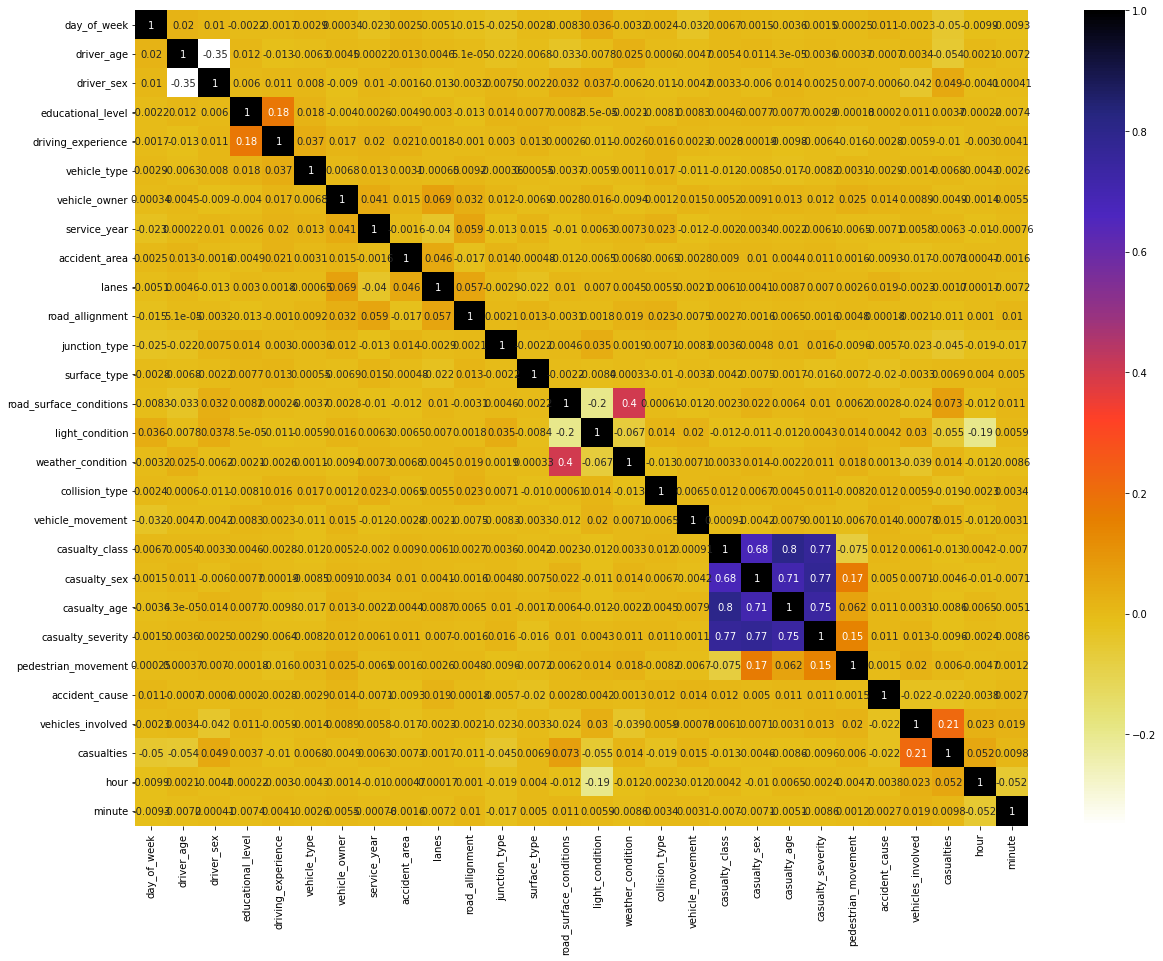

In [ ]:
plt.figure(figsize=(20,15))
correlations = X_unknown.corr(method='pearson')
sns.heatmap(correlations, annot=True, cmap=plt.cm.CMRmap_r)

In [ ]:
X_unknown_train, X_unknown_test, y_unknown_train, y_unknown_test = train_test_split(X_unknown, y_unknown, test_size=0.33, random_state=42)

## Baseline Model

In [ ]:
def modelling(X_train, y_train, X_test, y_test, **kwargs):
    scores = {}
    models = []
    if 'xgb' in kwargs.keys() and kwargs['xgb']:
        xgb = XGBClassifier()
        xgb.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))
        y_pred = xgb.predict(X_test._get_numeric_data())
        scores['xgb']= [accuracy_score(y_test, y_pred)]
#         scores['xgb']['roc_auc'] = roc_auc_score(y_test, y_pred)

    if 'rf' in kwargs.keys() and kwargs['rf']:
        rf = RandomForestClassifier(n_estimators=200)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        scores['rf']= [accuracy_score(y_test, y_pred)]
#         scores['rf']['roc_auc'] = roc_auc_score(y_test, y_pred)
        models.append(rf)

    if 'extree' in kwargs.keys() and kwargs['extree']:
        extree = ExtraTreesClassifier()
        extree.fit(X_train, y_train)
        y_pred = extree.predict(X_test)
        scores['extree'] = [accuracy_score(y_test, y_pred)]
#         scores['extree']['roc_auc'] = roc_auc_score(y_test, y_pred)
        models.append(extree)
        
    return scores

In [ ]:
modelling(X_unknown_train,y_unknown_train, X_unknown_test, y_unknown_test, xgb=True, rf=True, extree=True)

{'extree': [0.8386223862238622],
 'rf': [0.8388683886838868],
 'xgb': [0.8383763837638376]}

In [ ]:
def model_performance(model, y_test, y_hat) : 
    conf_matrix = confusion_matrix(y_test, y_hat)
    trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)", "2 (pred)"],
                        y = ["0 (true)","1 (true)", "2 (true)"],xgap = 2, ygap = 2, 
                        colorscale = 'Viridis', showscale  = False)

    #Show metrics
    Accuracy  =  accuracy_score(y_test, y_hat)
    Precision =  precision_score(y_test, y_hat, average= 'weighted')
    Recall    =  recall_score(y_test, y_hat, average= 'weighted')
    F1_score  =  f1_score(y_test, y_hat, average= 'weighted')

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values), 
                   y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto',
                   orientation = 'h', opacity = 0.8,marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))
 
     
    #plots
    model = model
    
    #Subplots
    fig = tls.make_subplots(rows=2, cols=1, print_grid=False, 
                          subplot_titles=('Confusion Matrix',
                                        'Metrics',
                                        ))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,2,1)
    
    fig['layout'].update(showlegend = False, title = '<b>Model performance report</b><br>'+str(model),
                        autosize = True, height = 800,width = 800,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        # margin = dict(b = 100)
                        )
    fig.layout.titlefont.size = 14
    
    py.iplot(fig)

In [ ]:
extree = ExtraTreesClassifier()
extree.fit(X_unknown_train, y_unknown_train)
y_unknown_pred_extree = extree.predict(X_unknown_test)
model_performance(extree,y_unknown_test, y_unknown_pred_extree)

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf.fit(X_unknown_train, y_unknown_train)
y_unknown_pred_rf = rf.predict(X_unknown_test)
model_performance(rf, y_unknown_test, y_unknown_pred_rf)

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [ ]:
xgb = XGBClassifier()
xgb.fit(X_unknown_train, y_unknown_train)
y_unknown_pred_xgb = xgb.predict(X_unknown_test)
model_performance(extree,y_unknown_test, y_unknown_pred_xgb)

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# define the model
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, oob_score = True)
param_grid = { 
    'n_estimators': [100, 200, 300],
    'ccp_alpha': [0.0, 0.1],
    # 'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : range(3, 10, 2),
    'min_samples_split' : range(10, 40, 10),
    # "min_samples_leaf": [1, 5, 10, 15, 20, 25, 30],
    'criterion' :['gini', 'entropy'],
    'bootstrap' : [True],
    'class_weight' : ["balanced", "balanced_subsample"]
}

# evaluate model
folds = 3
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 999)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=skf.split(X_unknown_train, y_unknown_train))
CV_rfc.fit(X_unknown_train, y_unknown_train)
CV_rfc.best_params_

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_split': 10,
 'n_estimators': 300}

In [ ]:
baseline_model = RandomForestClassifier(random_state=42, n_jobs=-1, oob_score = True, bootstrap=True, ccp_alpha=0.0,
                                        criterion='entropy', class_weight='balanced_subsample', 
                                        max_depth=11, 
                                        # n_estimators=300,
                                        min_samples_split=15
                                        )
baseline_model.fit(X_unknown_train, y_unknown_train)
y_unknown_pred_baseline_model = baseline_model.predict(X_unknown_test)
model_performance(baseline_model, y_unknown_test, y_unknown_pred_baseline_model)

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



## Model after resampling

In [ ]:
y_unknown_train.value_counts()

2.0    7013
1.0    1137
0.0     101
Name: accident_severity, dtype: int64

In [ ]:
oversample = SMOTE()
X_unknown_train, y_unknown_train = oversample.fit_resample(X_unknown_train, y_unknown_train)
y_unknown_train.value_counts()

2.0    7013
0.0    7013
1.0    7013
Name: accident_severity, dtype: int64

In [ ]:
# define the model
rfc_after_resampling = RandomForestClassifier(random_state=42, n_jobs=-1, oob_score = True)
param_grid = { 
    'n_estimators': range(200, 400, 50),
    'ccp_alpha': [0.0],
    # 'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : range(7, 15, 2),
    'min_samples_split' : range(10, 20, 2),
    # "min_samples_leaf": [1, 5, 10, 15, 20, 25, 30],
    'criterion' :['gini'],
    'bootstrap' : [True],
    'class_weight' : ["balanced_subsample"]
}

# evaluate model
CV_rfc_after_resampling = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=skf.split(X_unknown_train, y_unknown_train))
CV_rfc_after_resampling.fit(X_unknown_train, y_unknown_train)
CV_rfc_after_resampling.best_params_

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_depth': 13,
 'min_samples_split': 10,
 'n_estimators': 300}

In [ ]:
model_after_resampling = RandomForestClassifier(random_state=42, n_jobs=-1, bootstrap=True, ccp_alpha=0.0,
                                        criterion='gini', class_weight='balanced_subsample', 
                                        max_depth=13, 
                                        n_estimators=300,
                                        min_samples_split=10
                                        )
model_after_resampling.fit(X_unknown_train, y_unknown_train)
y_unknown_pred_after_resampling = model_after_resampling.predict(X_unknown_test)
model_performance(model_after_resampling, y_unknown_test, y_unknown_pred_after_resampling)

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead

